# Lab 25 - Part 2

First, let's import the necessary libraries.

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline
pd.set_option("display.max_columns",None)

###  Are the complaints in zip code 10468 different than in New York City as a whole?

Zip code 10468 contains Lehman College.  We will test whether the distribution of complaints in this zip code is the same as the distribution of complaints in all of New York City.

Null hypothesis:  The complaints in zip code 10468 have the same distribution as complaints made in New York City as a whole.

Alternative hypothesis:  The complaints in zip code 10468 have a different distribution as complaints made in New York City as a whole.

Test statistic:  The Total Variation Distance (TVD) from Lab 14.  Recall the TVD is computed between two distributions by taking the absolute difference of the probabilities for each category, summing them, and dividing by 2.  
Ex.  `np.abs(df["Distribution 1"] - df["Distribution 2"]).sum()/2`

Load the CSV file with call data from March 3 and 4, 2019 into the dataframe `calls`.  Read the `Created Date` column in as a date/time.

In [6]:
calls = pd.read_csv("Mar3_4_2019_311_Service_Requests.csv")
calls

Unique Key            Created Date             Closed Date Agency  \
0        41864921  03/03/2019 12:00:00 AM  03/08/2019 12:00:00 AM  DOHMH   
1        41907255  03/03/2019 12:00:00 AM  03/08/2019 12:05:00 PM    DEP   
2        41865062  03/03/2019 12:00:00 AM  03/12/2019 04:39:55 PM  DOHMH   
3        41864615  03/03/2019 12:00:00 AM  03/03/2019 12:00:00 AM  DOHMH   
4        41863890  03/03/2019 12:00:00 AM  03/11/2019 12:00:00 AM  DOHMH   
5        41863851  03/03/2019 12:00:00 AM  03/11/2019 05:22:33 PM  DOHMH   
6        41863798  03/03/2019 12:00:00 AM  03/08/2019 12:00:00 AM  DOHMH   
7        41862286  03/03/2019 12:00:00 AM  03/08/2019 04:38:51 PM  DOHMH   
8        41862267  03/03/2019 12:00:00 AM  03/11/2019 12:00:00 AM  DOHMH   
9        41860741  03/03/2019 12:00:00 AM                     NaN  DOHMH   
10       41863856  03/03/2019 12:00:00 AM  03/05/2019 03:31:26 PM  DOHMH   
11       41862287  03/03/2019 12:00:00 AM  03/12/2019 12:00:00 AM  DOHMH   
12       41864922  03/03/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
13       41863409  03/03/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
14       41863357  03/03/2019 12:00:00 AM  03/07/2019 12:00:00 AM  DOHMH   
15       41863356  03/03/2019 12:00:00 AM  03/07/2019 12:00:00 AM  DOHMH   
16       41862836  03/03/2019 12:00:00 AM  03/07/2019 12:00:00 AM  DOHMH   
17       41861553  03/03/2019 12:00:00 AM  03/07/2019 12:00:00 AM  DOHMH   
18       41861387  03/03/2019 12:00:00 AM  03/06/2019 12:00:00 AM  DOHMH   
19       41861274  03/03/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
20       41860747  03/03/2019 12:00:00 AM  03/07/2019 12:00:00 AM  DOHMH   
21       41860745  03/03/2019 12:00:00 AM  03/06/2019 12:00:00 AM  DOHMH   
22       41860247  03/03/2019 12:00:00 AM  03/08/2019 12:00:00 AM  DOHMH   
23       41860246  03/03/2019 12:00:00 AM  03/08/2019 12:00:00 AM  DOHMH   
24       41865416  03/03/2019 12:00:00 AM  03/07/2019 12:00:00 AM  DOHMH   
25       41865158  03/03/2019 12:00:00 AM  03/04/2019 12:00:00 AM  DOHMH   
26       41864976  03/03/2019 12:00:00 AM                     NaN  DOHMH   
27       41864888  03/03/2019 12:00:00 AM  03/03/2019 12:00:00 AM  DOHMH   
28       41864860  03/03/2019 12:00:00 AM                     NaN  DOHMH   
29       41864731  03/03/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
...           ...                     ...                     ...    ...   
12544    41874854  03/05/2019 12:00:00 AM  03/08/2019 12:00:00 AM  DOHMH   
12545    41874328  03/05/2019 12:00:00 AM  03/08/2019 04:10:48 PM  DOHMH   
12546    41883929  03/05/2019 12:00:00 AM                     NaN  DOHMH   
12547    41883488  03/05/2019 12:00:00 AM  03/05/2019 10:53:48 AM  DOHMH   
12548    41883487  03/05/2019 12:00:00 AM  03/05/2019 12:51:09 PM  DOHMH   
12549    41882790  03/05/2019 12:00:00 AM                     NaN  DOHMH   
12550    41882701  03/05/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
12551    41882647  03/05/2019 12:00:00 AM                     NaN  DOHMH   
12552    41882320  03/05/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
12553    41882165  03/05/2019 12:00:00 AM                     NaN  DOHMH   
12554    41881610  03/05/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
12555    41881193  03/05/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
12556    41880567  03/05/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
12557    41879663  03/05/2019 12:00:00 AM  03/06/2019 09:52:30 AM  DOHMH   
12558    41879615  03/05/2019 12:00:00 AM                     NaN  DOHMH   
12559    41879542  03/05/2019 12:00:00 AM                     NaN  DOHMH   
12560    41879148  03/05/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
12561    41878887  03/05/2019 12:00:00 AM                     NaN  DOHMH   
12562    41877424  03/05/2019 12:00:00 AM                     NaN  DOHMH   
12563    41877330  03/05/2019 12:00:00 AM  03/05/2019 12:00:00 AM  DOHMH   
12564    41877295  03/05/2019 12:00:00 AM  03/06/2019 0

Display the `calls` dataframe to make sure it was loaded into memory correctly.  If you want to see all column, run `pd.set_option("display.max_columns",None)` first.

First, get the probabilities of each complaint type in your whole dataframe and store them in the variable `nyc_probs`.  

<details> <summary>Hint:</summary>
The function `value_counts()` computes how many of each complaint happened, and adding the parameter `normalize = True` will divide each count by the total number of complaints, giving the probability.
</details>

In [9]:
nyc_probs = calls["Complaint Type"].value_counts(normalize = True)
nyc_probs

HEAT/HOT WATER                         0.121918
Noise - Residential                    0.093765
Request Large Bulky Item Collection    0.074121
Illegal Parking                        0.066566
Blocked Driveway                       0.061397
Street Condition                       0.042150
UNSANITARY CONDITION                   0.029744
Traffic Signal Condition               0.028631
PAINT/PLASTER                          0.026722
Street Light Condition                 0.022268
PLUMBING                               0.022268
Noise                                  0.019723
Sewer                                  0.018928
Electronics Waste                      0.016463
WATER LEAK                             0.016224
Noise - Commercial                     0.015190
Snow                                   0.014872
DOOR/WINDOW                            0.014633
Water System                           0.014554
Rodent                                 0.013122
Damaged Tree                           0

Next, create a new dataframe of only the calls from zip code 10468 (or a zip code of your choice.) 

<details> <summary>Hint:</summary>
Create a filter and then apply it.  You will have to look in the dataframe to see what the column containing the zip code is called.
</details>

In [14]:
zip_filter = calls["Incident Zip"] == 10468
calls_lehman = calls[zip_filter]
calls_lehman.head()

Unique Key            Created Date             Closed Date Agency  \
71     41858210  03/03/2019 12:03:53 AM  03/03/2019 02:07:40 AM   NYPD   
121    41857158  03/03/2019 12:13:36 AM  03/03/2019 02:06:39 AM   NYPD   
137    41855341  03/03/2019 12:18:54 AM  03/03/2019 01:42:08 AM   NYPD   
149    41863018  03/03/2019 12:21:51 AM  03/08/2019 02:11:23 AM    HPD   
161    41855742  03/03/2019 12:23:48 AM  03/03/2019 02:07:41 AM   NYPD   

                                           Agency Name       Complaint Type  \
71                     New York City Police Department  Noise - Residential   
121                    New York City Police Department  Noise - Residential   
137                    New York City Police Department  Noise - Residential   
149  Department of Housing Preservation and Develop...       HEAT/HOT WATER   
161                    New York City Police Department  Noise - Residential   

           Descriptor               Location Type  Incident Zip  \
71   Loud Music/Party  Residential Building/House       10468.0   
121  Loud Music/Party  Residential Building/House       10468.0   
137  Banging/Pounding  Residential Building/House       10468.0   
149   ENTIRE BUILDING        RESIDENTIAL BUILDING       10468.0   
161  Loud Music/Party  Residential Building/House       10468.0   

         Incident Address      Street Name         Cross Street 1  \
71     2784 MORRIS AVENUE    MORRIS AVENUE        EAST 196 STREET   
121    2710 MORRIS AVENUE    MORRIS AVENUE  EAST KINGSBRIDGE ROAD   
137  2285 SEDGWICK AVENUE  SEDGWICK AVENUE        WEST 183 STREET   
149  2615 GRAND CONCOURSE  GRAND CONCOURSE                    NaN   
161    2784 MORRIS AVENUE    MORRIS AVENUE        EAST 196 STREET   

      Cross Street 2 Intersection Street 1 Intersection Street 2 Address Type  \
71              BEND                   NaN                   NaN      ADDRESS   
121  EAST 196 STREET                   NaN                   NaN      ADDRESS   
137             BEND                   NaN                   NaN      ADDRESS   
149              NaN                   NaN                   NaN      ADDRESS   
161             BEND                   NaN                   NaN      ADDRESS   

      City Landmark Facility Type  Status                Due Date  \
71   BRONX      NaN      Precinct  Closed  03/03/2019 08:03:53 AM   
121  BRONX      NaN      Precinct  Closed  03/03/2019 08:13:36 AM   
137  BRONX      NaN      Precinct  Closed  03/03/2019 08:18:54 AM   
149  BRONX      NaN           NaN  Closed                     NaN   
161  BRONX      NaN      Precinct  Closed  03/03/2019 08:23:48 AM   

                                Resolution Description  \
71   The Police Department responded to the complai...   
121  The Police Department responded to the complai...   
137  Your request can not be processed at this time...   
149  The complaint you filed is a duplicate of a co...   
161  The Police Department responded to the complai...   

    Resolution Action Updated Date Community Board           BBL Borough  \
71          03/03/2019 02:07:40 AM        07 BRONX  2.033180e+09   BRONX   
121         03/03/2019 02:06:39 AM        07 BRONX  2.033160e+09   BRONX   
137         03/03/2019 01:42:08 AM        07 BRONX  2.032340e+09   BRONX   
149         03/08/2019 02:11:23 AM        07 BRONX  2.031680e+09   BRONX   
161         03/03/2019 02:07:41 AM        07 BRONX  2.033180e+09   BRONX   

     X Coordinate (State Plane)  Y Coordinate (State Plane)  \
71                    1013532.0                    256126.0   
121                   1013124.0                    255501.0   
137                   1009217.0                    253170.0   
149                   1013236.0                    254437.0   
161                   1013532.0                    256126.0   

    Open Data Channel Type Park Facility Name Park Borough  Vehicle Type  \
71                  ONLINE        Unspecified        BRONX           NaN   
121                  PHONE  

<details> <summary>Answer:</summary>
lehman_filter = calls["Incident Zip"] == 10468
lehman_calls = calls[lehman_filter]
</details>

Compute the probabilities of the different complaints in the 10468 zip code.

In [16]:
lehman_probs = calls_lehman["Complaint Type"].value_counts(normalize = True)
lehman_probs

Noise - Residential        0.270833
HEAT/HOT WATER             0.208333
PAINT/PLASTER              0.145833
Street Condition           0.055556
UNSANITARY CONDITION       0.048611
WATER LEAK                 0.041667
Illegal Parking            0.041667
Noise - Commercial         0.034722
PLUMBING                   0.020833
ELECTRIC                   0.020833
Blocked Driveway           0.020833
DOOR/WINDOW                0.013889
Noise - Street/Sidewalk    0.006944
Snow                       0.006944
Noise - Vehicle            0.006944
Rodent                     0.006944
Animal Abuse               0.006944
Sewer                      0.006944
GENERAL                    0.006944
FLOORING/STAIRS            0.006944
Smoking                    0.006944
Broken Parking Meter       0.006944
OUTSIDE BUILDING           0.006944
Name: Complaint Type, dtype: float64

Just looking at the first few probabilities in the two distributions, do you notice any differences?

We will now perform the hypothesis test to formally check if there is a difference between the distributions.  We will create a new dataframe containing the two distributions, and then can continue as in the jury panel example in Lab 14.  To make a new dataframe called `df` from the probabilities of the NYC complaints, type `df = pd.DataFrame(nyc_probs)` below.

In [17]:
df = pd.DataFrame(nyc_probs)

Check that the dataframe was created correctly.

In [18]:
df

Complaint Type
HEAT/HOT WATER                             0.121918
Noise - Residential                        0.093765
Request Large Bulky Item Collection        0.074121
Illegal Parking                            0.066566
Blocked Driveway                           0.061397
Street Condition                           0.042150
UNSANITARY CONDITION                       0.029744
Traffic Signal Condition                   0.028631
PAINT/PLASTER                              0.026722
Street Light Condition                     0.022268
PLUMBING                                   0.022268
Noise                                      0.019723
Sewer                                      0.018928
Electronics Waste                          0.016463
WATER LEAK                                 0.016224
Noise - Commercial                         0.015190
Snow                                       0.014872
DOOR/WINDOW                                0.014633
Water System                               0.014554
Rodent                                     0.013122
Damaged Tree                               0.012884
Noise - Vehicle                            0.011452
ELECTRIC                                   0.010736
Derelict Vehicle                           0.009941
FLOORING/STAIRS                            0.009623
Dirty Conditions                           0.009544
Noise - Street/Sidewalk                    0.009464
GENERAL                                    0.009384
Sanitation Condition                       0.009146
Building/Use                               0.008430
...                                             ...
Overflowing Litter Baskets                 0.000159
BEST/Site Safety                           0.000159
DOF Parking - DMV Clearance                0.000159
DOF Parking - Request Status               0.000159
Panhandling                                0.000159
Elder Abuse                                0.000159
Bus Stop Shelter Complaint                 0.000159
Recycling Enforcement                      0.000159
Highway Sign - Missing                     0.000159
Noise - House of Worship                   0.000080
Senior Center Complaint                    0.000080
Municipal Parking Facility                 0.000080
Found Property                             0.000080
Bus Stop Shelter Placement                 0.000080
Missed Collection (All Materials)          0.000080
Foam Ban Enforcement                       0.000080
DOF Property - RPIE Issue                  0.000080
Ferry Complaint                            0.000080
Home Care Provider Complaint               0.000080
Non-Residential Heat                       0.000080
Advocate - Other                           0.000080
Tattooing                                  0.000080
Day Care                                   0.000080
Noise - Helicopter                         0.000080
School Maintenance                         0.000080
Illegal Animal Kept as Pet                 0.000080
Scaffold Safety                            0.000080
Vacant Lot                                 0.000080
Bike/Roller/Skate Chronic                  0.000080
Advocate-Prop Refunds/Credits              0.000080

[144 rows x 1 columns]

Next let's add a column to our dataframe `df` containing the 10468 complaint probabilities.  Again display the new dataframe to check your code worked.

In [20]:
df["lehman_zip"] = lehman_probs
df

Complaint Type  lehman_zip
HEAT/HOT WATER                             0.121918    0.208333
Noise - Residential                        0.093765    0.270833
Request Large Bulky Item Collection        0.074121         NaN
Illegal Parking                            0.066566    0.041667
Blocked Driveway                           0.061397    0.020833
Street Condition                           0.042150    0.055556
UNSANITARY CONDITION                       0.029744    0.048611
Traffic Signal Condition                   0.028631         NaN
PAINT/PLASTER                              0.026722    0.145833
Street Light Condition                     0.022268         NaN
PLUMBING                                   0.022268    0.020833
Noise                                      0.019723         NaN
Sewer                                      0.018928    0.006944
Electronics Waste                          0.016463         NaN
WATER LEAK                                 0.016224    0.041667
Noise - Commercial                         0.015190    0.034722
Snow                                       0.014872    0.006944
DOOR/WINDOW                                0.014633    0.013889
Water System                               0.014554         NaN
Rodent                                     0.013122    0.006944
Damaged Tree                               0.012884         NaN
Noise - Vehicle                            0.011452    0.006944
ELECTRIC                                   0.010736    0.020833
Derelict Vehicle                           0.009941         NaN
FLOORING/STAIRS                            0.009623    0.006944
Dirty Conditions                           0.009544         NaN
Noise - Street/Sidewalk                    0.009464    0.006944
GENERAL                                    0.009384    0.006944
Sanitation Condition                       0.009146         NaN
Building/Use                               0.008430         NaN
...                                             ...         ...
Overflowing Litter Baskets                 0.000159         NaN
BEST/Site Safety                           0.000159         NaN
DOF Parking - DMV Clearance                0.000159         NaN
DOF Parking - Request Status               0.000159         NaN
Panhandling                                0.000159         NaN
Elder Abuse                                0.000159         NaN
Bus Stop Shelter Complaint                 0.000159         NaN
Recycling Enforcement                      0.000159         NaN
Highway Sign - Missing                     0.000159         NaN
Noise - House of Worship                   0.000080         NaN
Senior Center Complaint                    0.000080         NaN
Municipal Parking Facility                 0.000080         NaN
Found Property                             0.000080         NaN
Bus Stop Shelter Placement                 0.000080         NaN
Missed Collection (All Materials)          0.000080         NaN
Foam Ban Enforcement                       0.000080         NaN
DOF Property - RPIE Issue                  0.000080         NaN
Ferry Complaint                            0.000080         NaN
Home Care Provider Complaint               0.000080         NaN
Non-Residential Heat                       0.000080         NaN
Advocate - Other                           0.000080         NaN
Tattooing                                  0.000080         NaN
Day Care                                   0.000080         NaN
Noise - Helicopter                         0.000080         NaN
School Maintenance                         0.000080         NaN
Illegal Animal Kept as Pet                 0.000080         NaN
Scaffold Safety                            0.000080         NaN
Vacant Lot                                 0.000080         NaN
Bike/Roller/Skate Chronic                  0.000080         NaN
Advocate-Prop Refunds/Credits              0.000080         NaN

[144 rows x 2 columns]

Some complaints showed up in the NYC calls, but not the calls from zip 10468.  How can you tell which complaints these are in the dataframe?

Complaints were in the NYC calls but not the 10468 calls have `NaN` for the probability in the 10468 column.  If we wanted to replace `NaN` with a number, what should the number be?

To replace the NaNs with 0's, type `df = df.fillna(0)` below and run it. Note that you need `df=` to save the changes you made.

In [22]:
df = df.fillna(0)
df

Complaint Type  lehman_zip
HEAT/HOT WATER                             0.121918    0.208333
Noise - Residential                        0.093765    0.270833
Request Large Bulky Item Collection        0.074121    0.000000
Illegal Parking                            0.066566    0.041667
Blocked Driveway                           0.061397    0.020833
Street Condition                           0.042150    0.055556
UNSANITARY CONDITION                       0.029744    0.048611
Traffic Signal Condition                   0.028631    0.000000
PAINT/PLASTER                              0.026722    0.145833
Street Light Condition                     0.022268    0.000000
PLUMBING                                   0.022268    0.020833
Noise                                      0.019723    0.000000
Sewer                                      0.018928    0.006944
Electronics Waste                          0.016463    0.000000
WATER LEAK                                 0.016224    0.041667
Noise - Commercial                         0.015190    0.034722
Snow                                       0.014872    0.006944
DOOR/WINDOW                                0.014633    0.013889
Water System                               0.014554    0.000000
Rodent                                     0.013122    0.006944
Damaged Tree                               0.012884    0.000000
Noise - Vehicle                            0.011452    0.006944
ELECTRIC                                   0.010736    0.020833
Derelict Vehicle                           0.009941    0.000000
FLOORING/STAIRS                            0.009623    0.006944
Dirty Conditions                           0.009544    0.000000
Noise - Street/Sidewalk                    0.009464    0.006944
GENERAL                                    0.009384    0.006944
Sanitation Condition                       0.009146    0.000000
Building/Use                               0.008430    0.000000
...                                             ...         ...
Overflowing Litter Baskets                 0.000159    0.000000
BEST/Site Safety                           0.000159    0.000000
DOF Parking - DMV Clearance                0.000159    0.000000
DOF Parking - Request Status               0.000159    0.000000
Panhandling                                0.000159    0.000000
Elder Abuse                                0.000159    0.000000
Bus Stop Shelter Complaint                 0.000159    0.000000
Recycling Enforcement                      0.000159    0.000000
Highway Sign - Missing                     0.000159    0.000000
Noise - House of Worship                   0.000080    0.000000
Senior Center Complaint                    0.000080    0.000000
Municipal Parking Facility                 0.000080    0.000000
Found Property                             0.000080    0.000000
Bus Stop Shelter Placement                 0.000080    0.000000
Missed Collection (All Materials)          0.000080    0.000000
Foam Ban Enforcement                       0.000080    0.000000
DOF Property - RPIE Issue                  0.000080    0.000000
Ferry Complaint                            0.000080    0.000000
Home Care Provider Complaint               0.000080    0.000000
Non-Residential Heat                       0.000080    0.000000
Advocate - Other                           0.000080    0.000000
Tattooing                                  0.000080    0.000000
Day Care                                   0.000080    0.000000
Noise - Helicopter                         0.000080    0.000000
School Maintenance                         0.000080    0.000000
Illegal Animal Kept as Pet                 0.000080    0.000000
Scaffold Safety                            0.000080    0.000000
Vacant Lot                                 0.000080    0.000000
Bike/Roller/Skate Chronic                  0.000080    0.000000
Advocate-Prop Refunds/Credits              0.000080    0.000000

[144 rows x 2 columns]

Check that the NaNs have been replaced by 0's by displaying `df`.

We want to know if the differences between the 10468 complaint distribution and the NYC complain distribution are just due to chance or because the distributions are different.  To test this, we need to:

1. Compute the size of the sample of 10468 complaints (to know how large our samples in step 3 should be). 
2. Compute the Total Variation Distance (TVD) between the 10468 and NYC complaint distributions
3. Compute the Total Variation Distances between samples from all complaints and the NYC complaint distribution and make a histogram of them.
4. Compare the TVD from step 2 with the histogram from step 3, and accept or reject the null hypothesis.

Do step 1: compute the size of the sample of 10468 complaints (to know how large our samples in step 3 should be)

In [23]:
calls_lehman.shape

(144, 41)

Do step 2: compute the Total Variation Distance (TVD) between the 10468 and NYC complaint distributions.

That is, compute the TVD between the `Complaint Type` and `10468 Complaints` columns in your dataframe `df`.

In [24]:
np.abs(df["Complaint Type"] - df["lehman_zip"]).sum()/2

0.4905592227347436

<details> <summary>Answer:</summary>
np.abs(df["Complaint Type"] - df["10468 Complaints"]).sum()/2
</details>

We will break step 3 up.  First, let's generate one sample from the NYC complaint distributions.  Instead of simulating the sample like in the previous hypothesis testing examples, simply take a sample of size 144 from the `calls` dataframe.

In [26]:
sample = calls.sample(144)

Compute the probabilities for the complaints in the sample, and add them to dataframe `df` as a new column.  Remember to replace the NaNs with 0's.

In [33]:
df["random"] = sample["Complaint Type"].value_counts(normalize = True)
df = df.fillna(0)
df

Complaint Type  lehman_zip    random
HEAT/HOT WATER                             0.121918    0.208333  0.097222
Noise - Residential                        0.093765    0.270833  0.125000
Request Large Bulky Item Collection        0.074121    0.000000  0.083333
Illegal Parking                            0.066566    0.041667  0.055556
Blocked Driveway                           0.061397    0.020833  0.069444
Street Condition                           0.042150    0.055556  0.013889
UNSANITARY CONDITION                       0.029744    0.048611  0.048611
Traffic Signal Condition                   0.028631    0.000000  0.027778
PAINT/PLASTER                              0.026722    0.145833  0.013889
Street Light Condition                     0.022268    0.000000  0.013889
PLUMBING                                   0.022268    0.020833  0.006944
Noise                                      0.019723    0.000000  0.006944
Sewer                                      0.018928    0.006944  0.041667
Electronics Waste                          0.016463    0.000000  0.013889
WATER LEAK                                 0.016224    0.041667  0.006944
Noise - Commercial                         0.015190    0.034722  0.013889
Snow                                       0.014872    0.006944  0.006944
DOOR/WINDOW                                0.014633    0.013889  0.006944
Water System                               0.014554    0.000000  0.013889
Rodent                                     0.013122    0.006944  0.006944
Damaged Tree                               0.012884    0.000000  0.020833
Noise - Vehicle                            0.011452    0.006944  0.027778
ELECTRIC                                   0.010736    0.020833  0.013889
Derelict Vehicle                           0.009941    0.000000  0.000000
FLOORING/STAIRS                            0.009623    0.006944  0.006944
Dirty Conditions                           0.009544    0.000000  0.020833
Noise - Street/Sidewalk                    0.009464    0.006944  0.013889
GENERAL                                    0.009384    0.006944  0.000000
Sanitation Condition                       0.009146    0.000000  0.020833
Building/Use                               0.008430    0.000000  0.000000
...                                             ...         ...       ...
Overflowing Litter Baskets                 0.000159    0.000000  0.000000
BEST/Site Safety                           0.000159    0.000000  0.000000
DOF Parking - DMV Clearance                0.000159    0.000000  0.000000
DOF Parking - Request Status               0.000159    0.000000  0.000000
Panhandling                                0.000159    0.000000  0.000000
Elder Abuse                                0.000159    0.000000  0.000000
Bus Stop Shelter Complaint                 0.000159    0.000000  0.000000
Recycling Enforcement                      0.000159    0.000000  0.000000
Highway Sign - Missing                     0.000159    0.000000  0.000000
Noise - House of Worship                   0.000080    0.000000  0.000000
Senior Center Complaint                    0.000080    0.000000  0.000000
Municipal Parking Facility                 0.000080    0.000000  0.000000
Found Property                             0.000080    0.000000  0.000000
Bus Stop Shelter Placement                 0.000080    0.000000  0.000000
Missed Collection (All Materials)          0.000080    0.000000  0.000000
Foam Ban Enforcement                       0.000080    0.000000  0.000000
DOF Property - RPIE Issue                  0.000080    0.000000  0.000000
Ferry Complaint                            0.000080    0.000000  0.000000
Home Care Provider Complaint               0.000080    0.000000  0.000000
Non-Residential Heat                       0.000080    0.000000  0.000000
Advocate - Other                           0.000080    0.000000  0.000000
Tattooing                                  0.000080    0.000000  0.000000
Day Care                                 

<details> <summary>Answer:</summary>
sample_counts = sample["Complaint Type"].value_counts(normalize = True)
df["Sample complaints"] = sample_counts
df = df.fillna(0)
df
</details>

Compute the TVD between the sample complaints and all NYC complaints.

In [34]:
np.abs(df["random"] - df["Complaint Type"]).sum()/2

0.28177080571903224

<details> <summary>Answer:</summary>
np.abs(df["Sample complaints"] - df["Complaint Type"]).sum()/2
</details>

Now we want to repeat these steps (sample from `calls` and compute the TVD between the sample and all NYC complaints) many times.

In [37]:
tvds = []
for i in range(1000):
    sample = calls.sample(144)
    sample_counts = sample["Complaint Type"].value_counts(normalize = True)
    df["random"] = sample_counts
    df = df.fillna(0)
    sample_tvd = np.abs(df["random"] - df["Complaint Type"]).sum()/2
    tvds.append(sample_tvd)
    

<details> <summary>Answer:</summary>
tvds = []
for i in range(10000):
    sample = calls.sample(144)
    sample_counts = sample["Complaint Type"].value_counts(normalize = True)
    df["Sample complaints"] = sample_counts
    df = df.fillna(0)
    sample_tvd = np.abs(df["Sample complaints"] - df["Complaint Type"]).sum()/2
    tvds.append(sample_tvd)
</details>

Display the histogram of the TVDs:

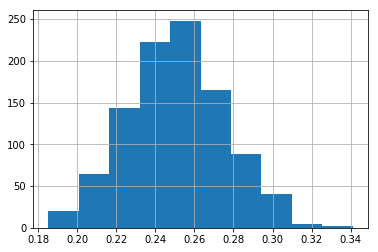

In [39]:
pd.Series(tvds).hist()

Finally, compare the TVD between the 10468 sample and all NYC complaints with the histogram, and decide whether to reject the null hypothesis or not.